In [95]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [177]:
df=pd.read_csv("D:\Data (2).csv")

In [178]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [179]:
df.describe()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,visited_doctor_last_1_year,daily_avg_steps,age,heart_decs_history,other_major_decs_history,avg_glucose_level,bmi,Year_last_admitted,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,17499.500000,4.089040,0.773680,0.081720,3.104200,5215.889320,44.918320,0.054640,0.098160,167.530000,31.393328,2003.892217,71.610480,2.517960,28.812280,27147.407680
std,7217.022701,2.606612,1.199449,0.273943,1.141663,1053.179748,16.107492,0.227281,0.297537,62.729712,7.876535,7.581521,9.325183,1.690335,8.632382,14323.691832
min,5000.000000,0.000000,0.000000,0.000000,0.000000,2034.000000,16.000000,0.000000,0.000000,57.000000,12.300000,1990.000000,52.000000,0.000000,11.000000,2468.000000
25%,11249.750000,2.000000,0.000000,0.000000,2.000000,4543.000000,31.000000,0.000000,0.000000,113.000000,26.100000,1997.000000,64.000000,1.000000,21.000000,16042.000000
50%,17499.500000,4.000000,0.000000,0.000000,3.000000,5089.000000,45.000000,0.000000,0.000000,168.000000,30.500000,2004.000000,72.000000,3.000000,31.000000,27148.000000
75%,23749.250000,6.000000,1.000000,0.000000,4.000000,5730.000000,59.000000,0.000000,0.000000,222.000000,35.600000,2010.000000,78.000000,4.000000,36.000000,37020.000000
max,29999.000000,8.000000,5.000000,1.000000,12.000000,11255.000000,74.000000,1.000000,1.000000,277.000000,100.600000,2018.000000,96.000000,6.000000,42.000000,67870.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [181]:
df.shape

(25000, 24)

In [182]:
df.nunique()

applicant_id                      25000
years_of_insurance_with_us            9
regular_checkup_lasy_year             6
adventure_sports                      2
Occupation                            3
visited_doctor_last_1_year           12
cholesterol_level                     5
daily_avg_steps                    4914
age                                  59
heart_decs_history                    2
other_major_decs_history              2
Gender                                2
avg_glucose_level                   221
bmi                                 465
smoking_status                        4
Year_last_admitted                   29
Location                             15
weight                               45
covered_by_any_other_company          2
Alcohol                               3
exercise                              3
weight_change_in_last_one_year        7
fat_percentage                       32
insurance_cost                       54
dtype: int64

In [183]:
df.isnull().sum().sum()

12871

In [184]:
df.duplicated().sum()

0

In [185]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']
['applicant_id', 'years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level', 'bmi', 'Year_last_admitted', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


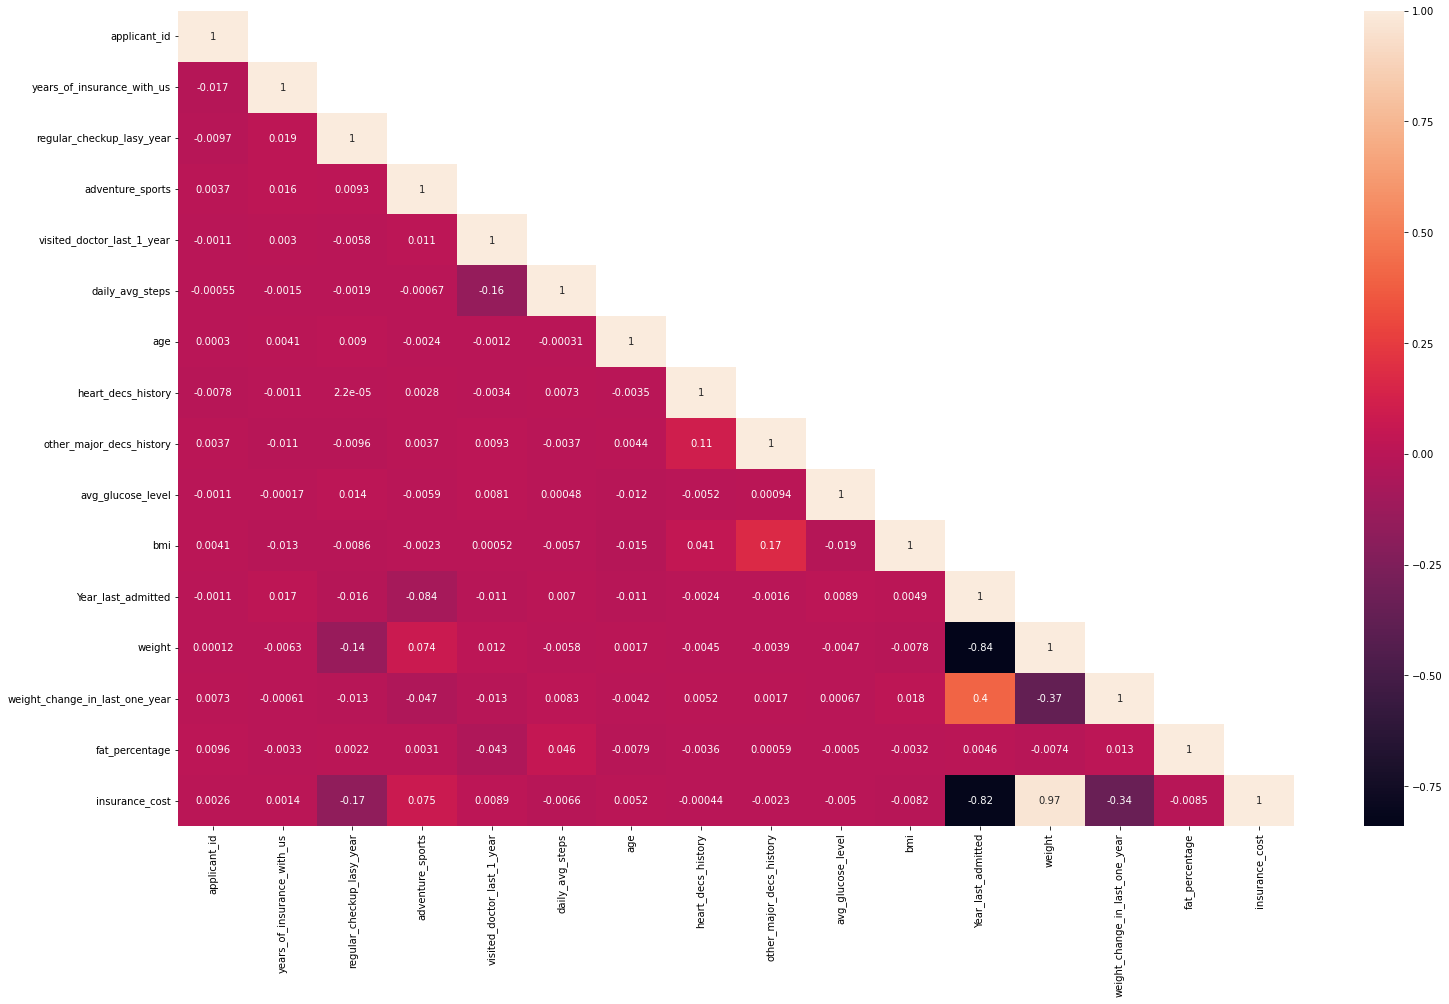

In [186]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), annot=True,mask=np.triu(df.corr(),+1));

In [187]:
df.isnull().sum()

applicant_id                          0
years_of_insurance_with_us            0
regular_checkup_lasy_year             0
adventure_sports                      0
Occupation                            0
visited_doctor_last_1_year            0
cholesterol_level                     0
daily_avg_steps                       0
age                                   0
heart_decs_history                    0
other_major_decs_history              0
Gender                                0
avg_glucose_level                     0
bmi                                 990
smoking_status                        0
Year_last_admitted                11881
Location                              0
weight                                0
covered_by_any_other_company          0
Alcohol                               0
exercise                              0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64

In [188]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [189]:
df.drop(["applicant_id","Year_last_admitted"],axis=1,inplace=True)

In [190]:
df.isnull().sum()

years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [191]:
# unique value counts in the sex category

df['Gender'].value_counts()

Male      16422
Female     8578
Name: Gender, dtype: int64

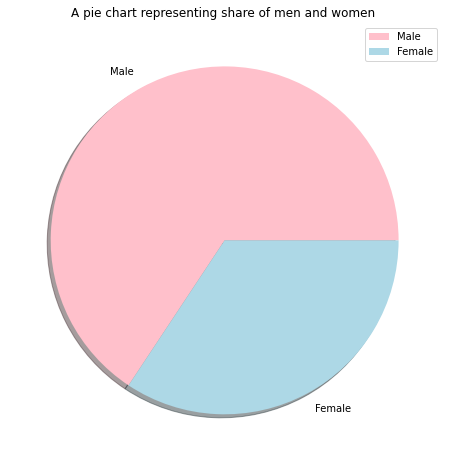

In [192]:
# pie chart

size = [16422, 8578]
colors = ['pink', 'lightblue']
labels = "Male", "Female"

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, colors = colors, labels = labels, shadow = True)
plt.title('A pie chart representing share of men and women ')
plt.legend()
plt.show()

<AxesSubplot:>

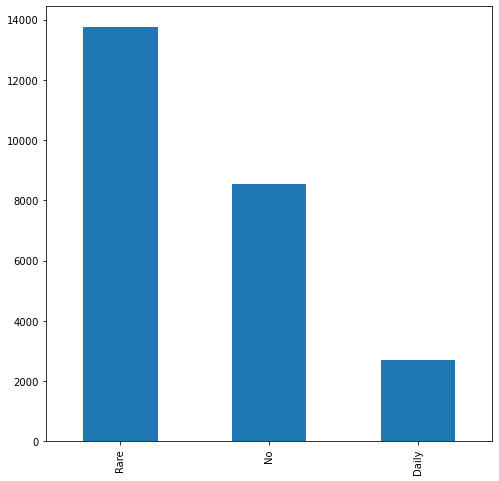

In [193]:
df['Alcohol'].value_counts().plot.bar()

<AxesSubplot:>

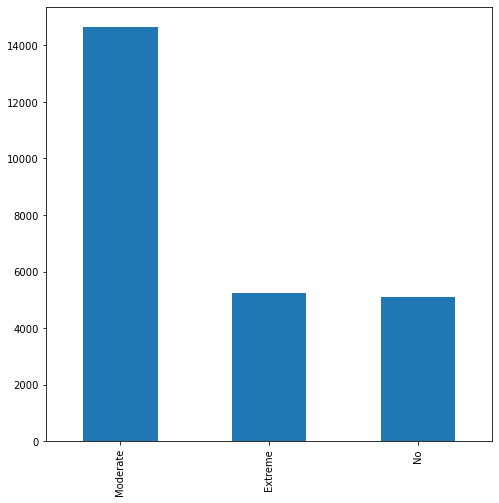

In [194]:
df['exercise'].value_counts().plot.bar()

<AxesSubplot:>

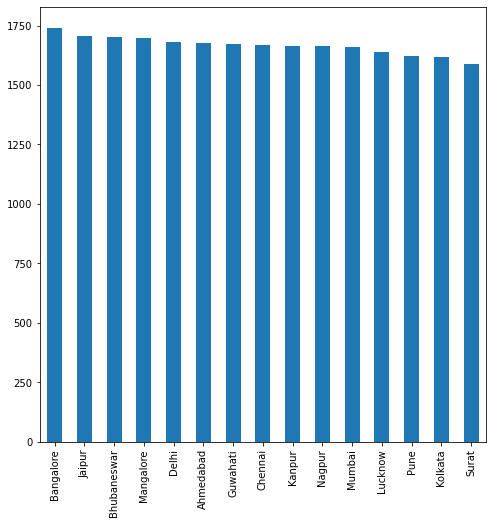

In [195]:
df['Location'].value_counts().plot.bar()

<AxesSubplot:>

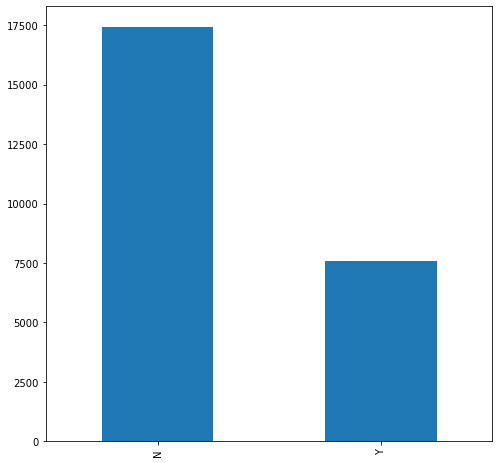

In [196]:
df['covered_by_any_other_company'].value_counts().plot.bar()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


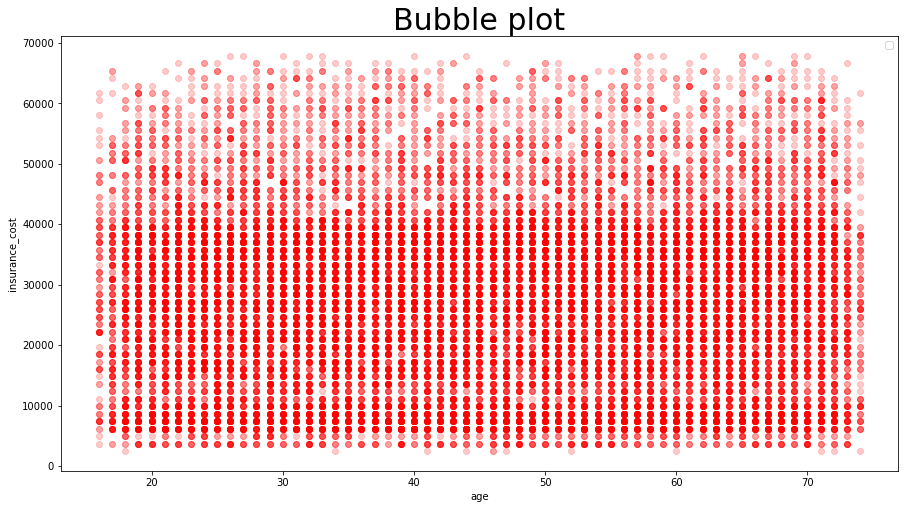

In [197]:
plt.rcParams['figure.figsize'] = (15, 8)
plt.scatter(x = df['age'], y = df['insurance_cost'],alpha = 0.2, color = 'red')
plt.title('Bubble plot', fontsize = 30)
plt.xlabel('age')
plt.ylabel('insurance_cost')
plt.legend()
plt.show()

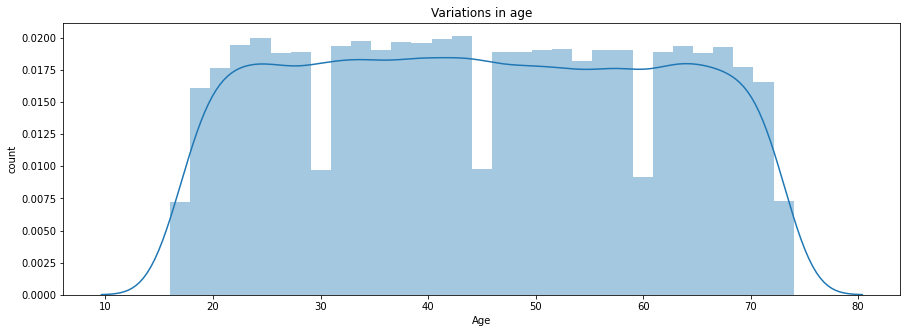

In [198]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(df['age'])
plt.title('Variations in age')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

<AxesSubplot:>

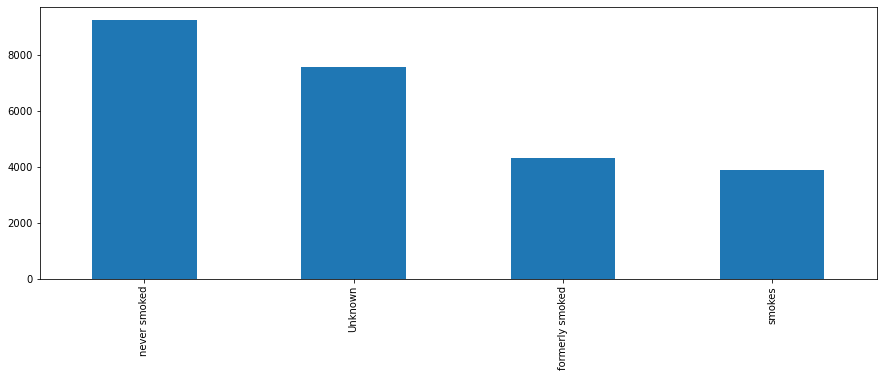

In [199]:
# checking how many people smoke

df['smoking_status'].value_counts().plot.bar()

Text(0.5, 1.0, 'Age vs insurance_cost')

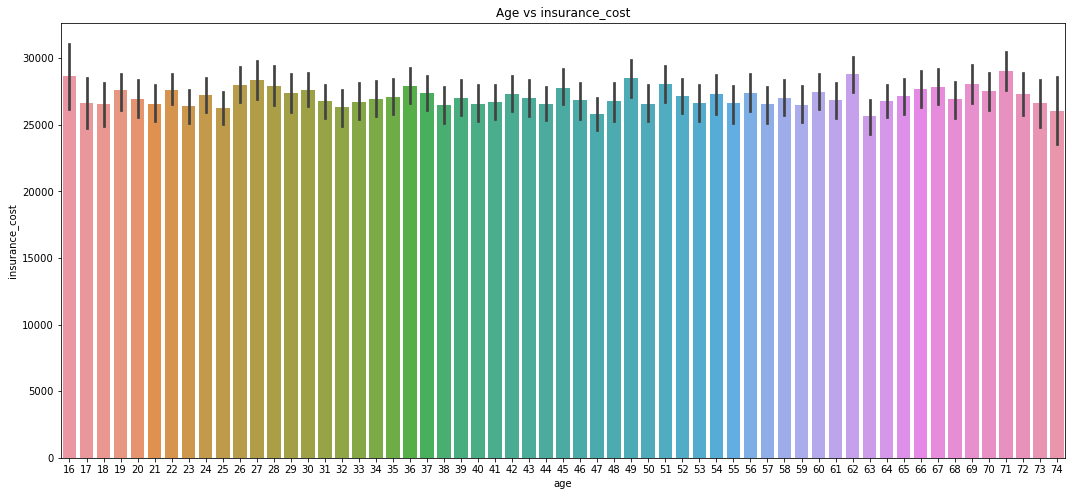

In [200]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'age', y = 'insurance_cost', data = df)

plt.title("Age vs insurance_cost")

Text(0.5, 1.0, 'gender vs insurance_cost')

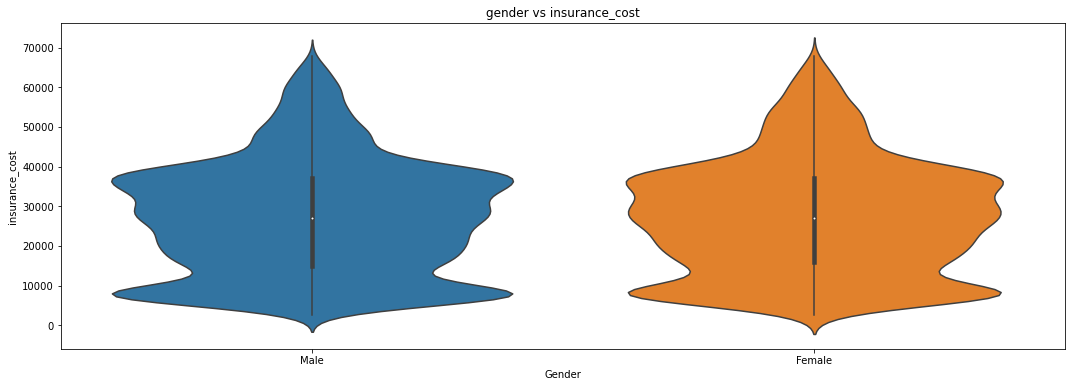

In [201]:
plt.figure(figsize = (18, 6))
sns.violinplot(x = 'Gender', y = 'insurance_cost', data = df)

plt.title('gender vs insurance_cost')

Text(0.5, 1.0, 'Location vs insurance_cost')

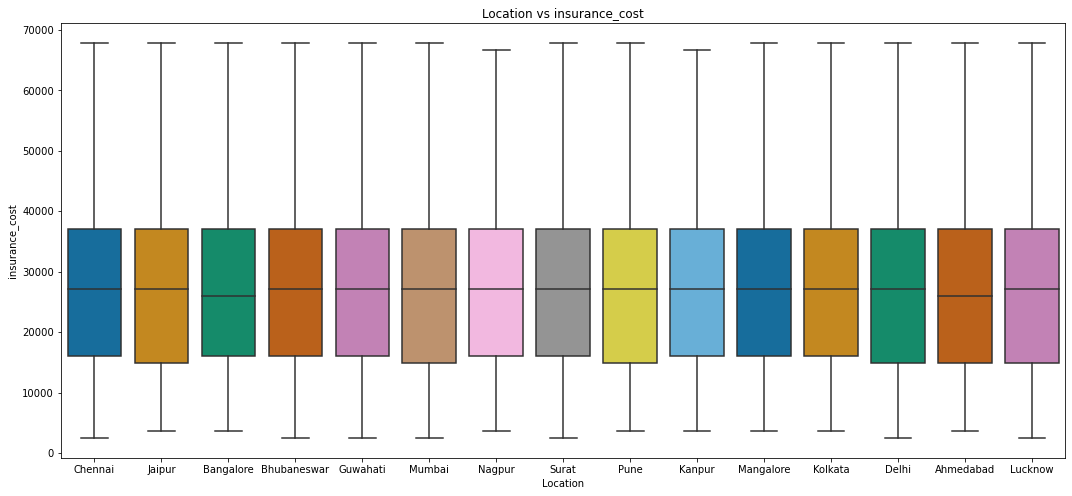

In [202]:
# region vs charges
# From the graph we can see that the region actually does not play any role in determining the insurance charges

plt.figure(figsize = (18, 8))
sns.boxplot(x = 'Location', y = 'insurance_cost', data = df, palette = 'colorblind')

plt.title('Location vs insurance_cost')

<AxesSubplot:>

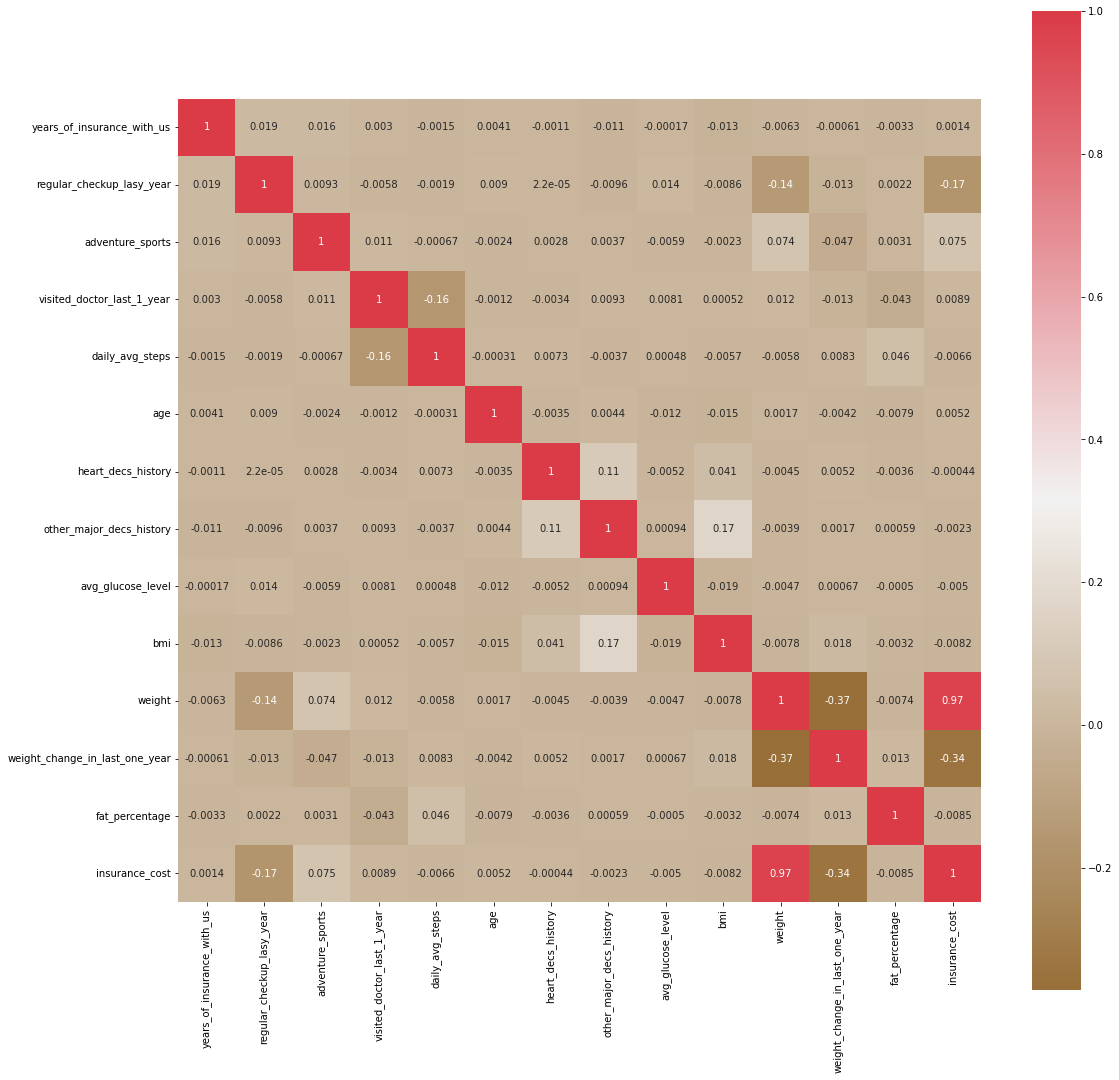

In [203]:
f, ax = plt.subplots(figsize = (18, 18))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax,annot = True)

In [204]:
df.corr()['insurance_cost'].sort_values(ascending=False)

insurance_cost                    1.000000
weight                            0.970357
adventure_sports                  0.074561
visited_doctor_last_1_year        0.008890
age                               0.005195
years_of_insurance_with_us        0.001404
heart_decs_history               -0.000445
other_major_decs_history         -0.002268
avg_glucose_level                -0.005007
daily_avg_steps                  -0.006565
bmi                              -0.008231
fat_percentage                   -0.008486
regular_checkup_lasy_year        -0.174005
weight_change_in_last_one_year   -0.342710
Name: insurance_cost, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

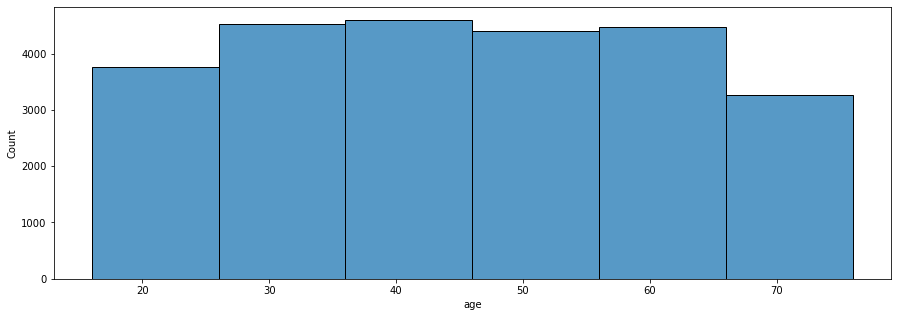

In [205]:
sns.histplot(data=df, x="age",binwidth=10)

In [206]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Occupation
['Salried', 'Student', 'Business']
Categories (3, object): ['Business', 'Salried', 'Student']
[1 2 0]


feature: cholesterol_level
['125 to 150', '150 to 175', '200 to 225', '175 to 200', '225 to 250']
Categories (5, object): ['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250']
[0 1 3 2 4]


feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
[1 0]


feature: smoking_status
['Unknown', 'formerly smoked', 'never smoked', 'smokes']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']
[0 1 2 3]


feature: Location
['Chennai', 'Jaipur', 'Bangalore', 'Bhubaneswar', 'Guwahati', ..., 'Mangalore', 'Kolkata', 'Delhi', 'Ahmedabad', 'Lucknow']
Length: 15
Categories (15, object): ['Ahmedabad', 'Bangalore', 'Bhubaneswar', 'Chennai', ..., 'Mumbai', 'Nagpur', 'Pune', 'Surat']
[ 3  6  1  2  5 11 12 14 13  7 10  8  4  0  9]


feature: covered_by_any_other_company
['N', 'Y']
Categories (2, object): ['N', 'Y']
[

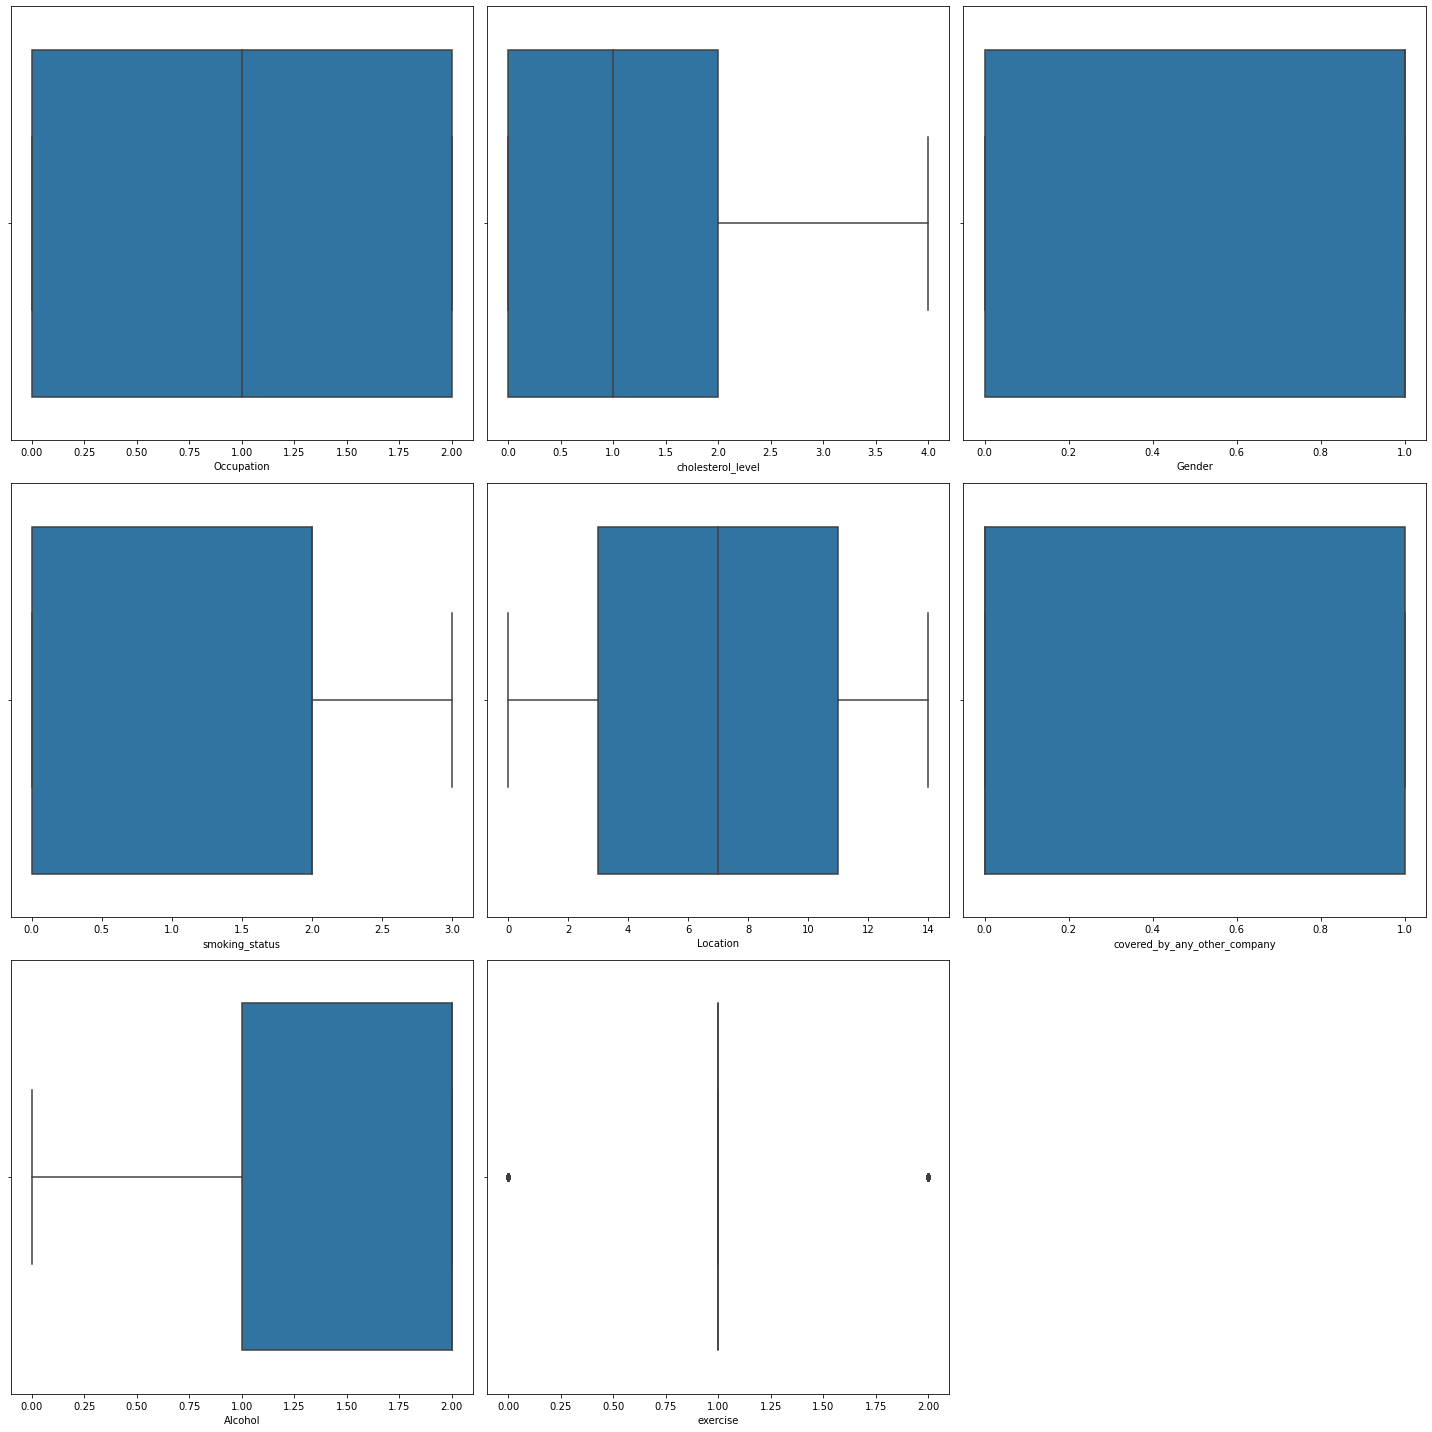

In [207]:
data_plot=df[['Occupation', 'cholesterol_level', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

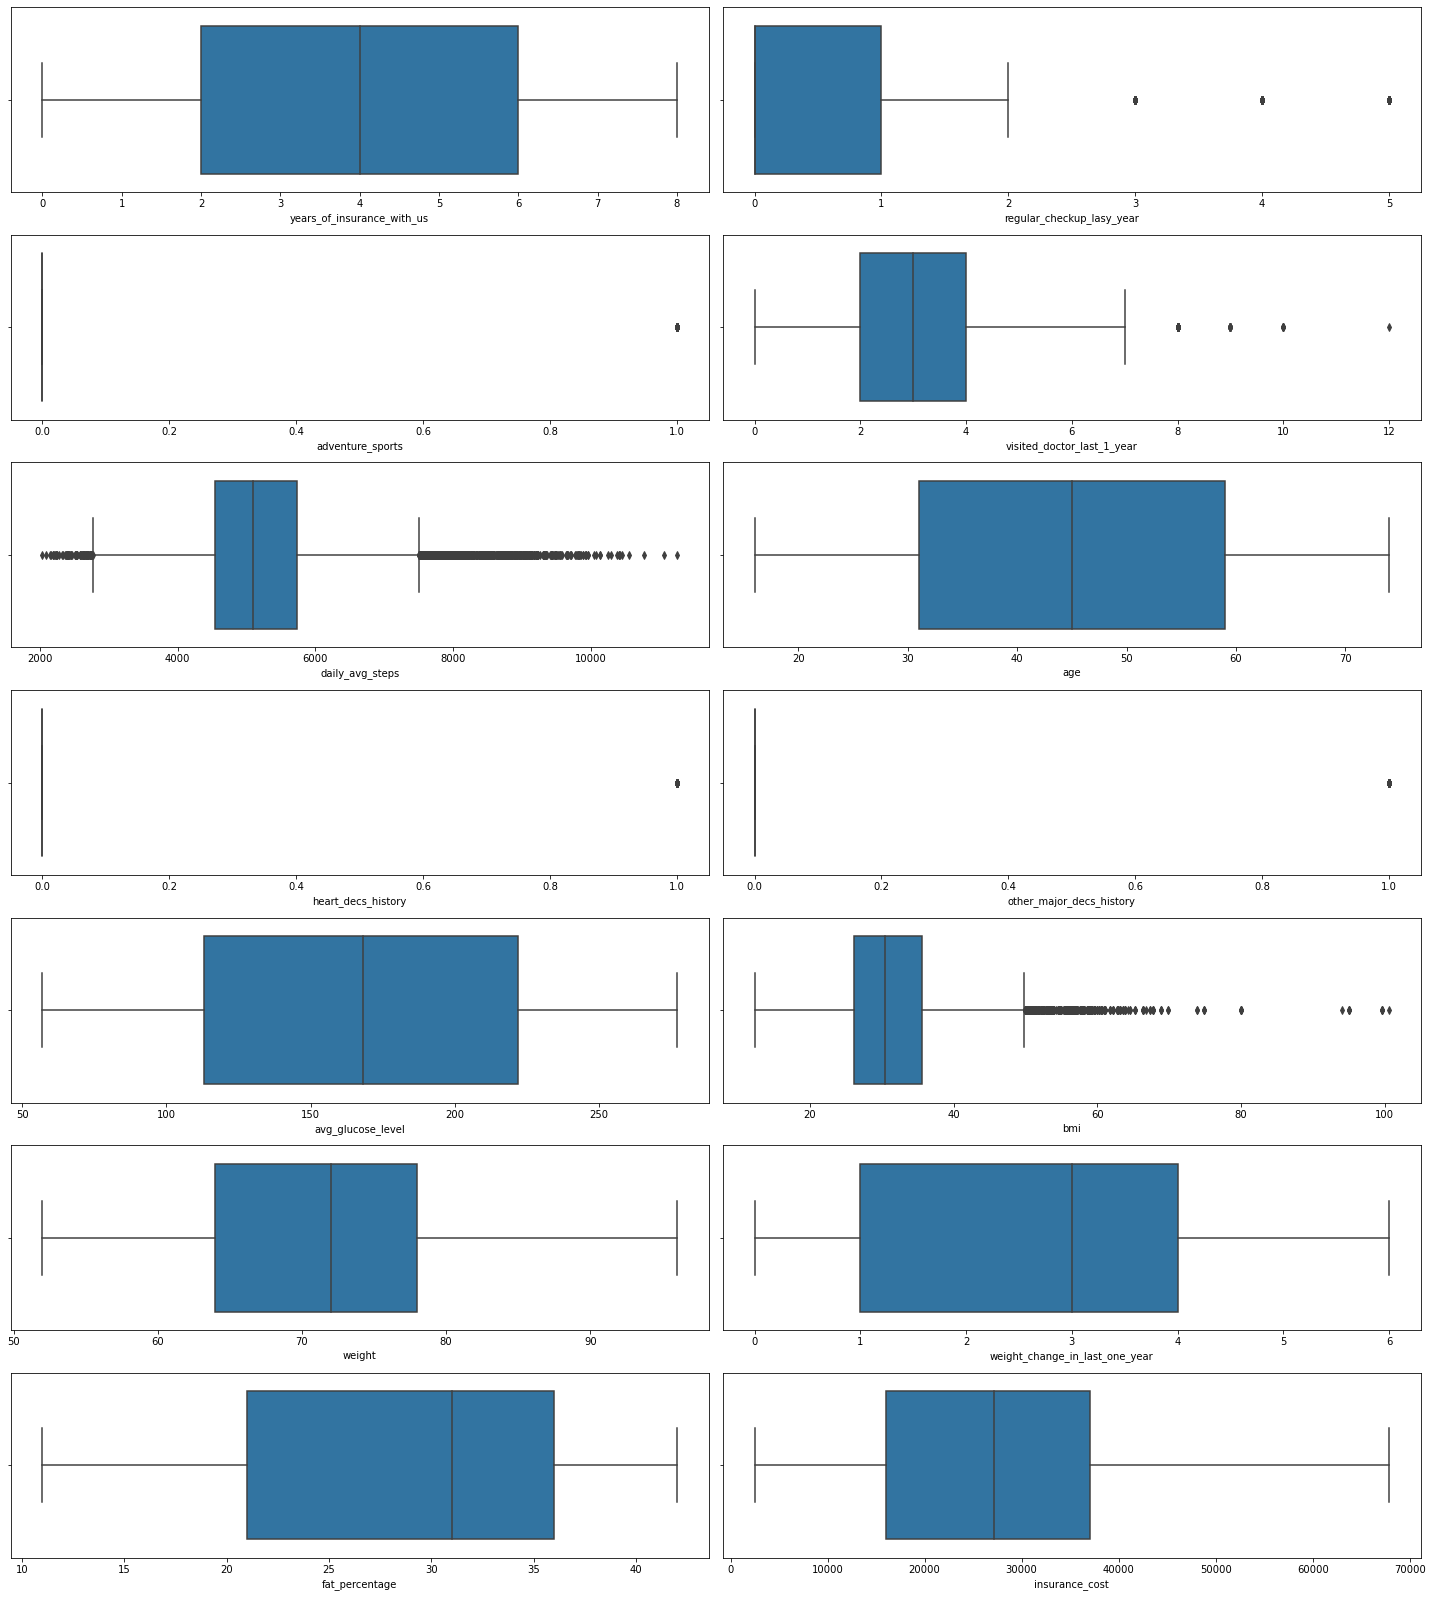

In [208]:
data_plot=df[['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'heart_decs_history', 'other_major_decs_history', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']]
fig=plt.figure(figsize=(20,25))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(8,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()

In [209]:
Q1 = df.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = df.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [210]:
lower_range

years_of_insurance_with_us           -4.00
regular_checkup_lasy_year            -1.50
adventure_sports                      0.00
Occupation                           -3.00
visited_doctor_last_1_year           -1.00
cholesterol_level                    -3.00
daily_avg_steps                    2762.50
age                                 -11.00
heart_decs_history                    0.00
other_major_decs_history              0.00
Gender                               -1.50
avg_glucose_level                   -50.50
bmi                                  11.85
smoking_status                       -3.00
Location                             -9.00
weight                               43.00
covered_by_any_other_company         -1.50
Alcohol                              -0.50
exercise                              1.00
weight_change_in_last_one_year       -3.50
fat_percentage                       -1.50
insurance_cost                   -15425.00
dtype: float64

In [211]:
upper_range

years_of_insurance_with_us           12.00
regular_checkup_lasy_year             2.50
adventure_sports                      0.00
Occupation                            5.00
visited_doctor_last_1_year            7.00
cholesterol_level                     5.00
daily_avg_steps                    7510.50
age                                 101.00
heart_decs_history                    0.00
other_major_decs_history              0.00
Gender                                2.50
avg_glucose_level                   385.50
bmi                                  49.85
smoking_status                        5.00
Location                             23.00
weight                               99.00
covered_by_any_other_company          2.50
Alcohol                               3.50
exercise                              1.00
weight_change_in_last_one_year        8.50
fat_percentage                       58.50
insurance_cost                    68487.00
dtype: float64

In [212]:
df['bmi']=np.where(df['bmi']> 49.85, 49.85 ,df['bmi'])

In [213]:
df['bmi'].fillna(30.5, inplace = True)

In [214]:
df.isnull().sum()

years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

for feature in df[['regular_checkup_lasy_year','adventure_sports', 'visited_doctor_last_1_year', 'daily_avg_steps', 'heart_decs_history', 'other_major_decs_history','bmi']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr, lr, df[feature])

<AxesSubplot:>

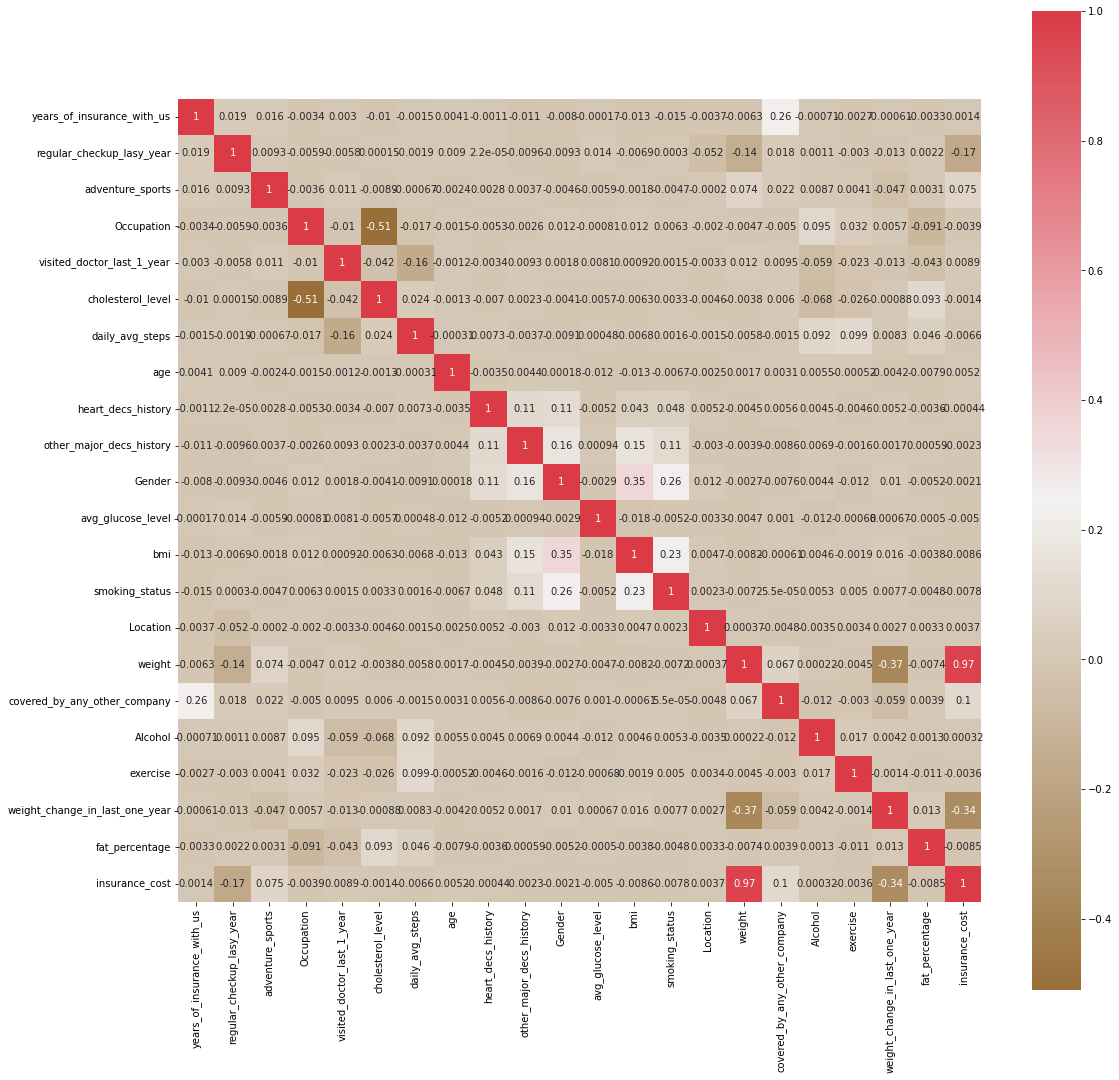

In [215]:
f, ax = plt.subplots(figsize = (18, 18))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax,annot = True)

In [216]:
df.corr()['insurance_cost'].sort_values(ascending=False)

insurance_cost                    1.000000
weight                            0.970357
covered_by_any_other_company      0.101624
adventure_sports                  0.074561
visited_doctor_last_1_year        0.008890
age                               0.005195
Location                          0.003671
years_of_insurance_with_us        0.001404
Alcohol                           0.000321
heart_decs_history               -0.000445
cholesterol_level                -0.001442
Gender                           -0.002149
other_major_decs_history         -0.002268
exercise                         -0.003646
Occupation                       -0.003888
avg_glucose_level                -0.005007
daily_avg_steps                  -0.006565
smoking_status                   -0.007818
fat_percentage                   -0.008486
bmi                              -0.008646
regular_checkup_lasy_year        -0.174005
weight_change_in_last_one_year   -0.342710
Name: insurance_cost, dtype: float64

<AxesSubplot:xlabel='Alcohol', ylabel='insurance_cost'>

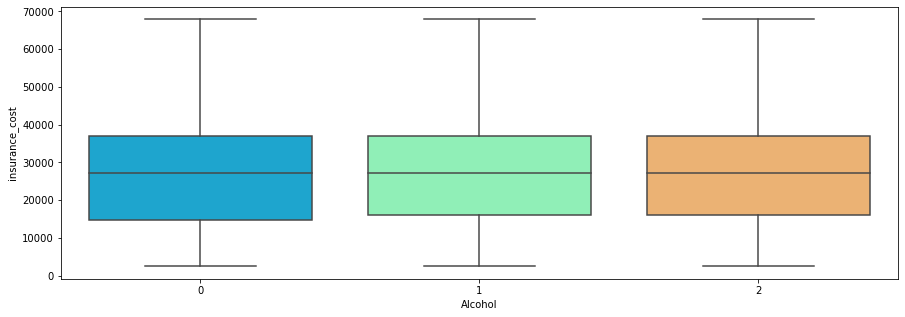

In [217]:
sns.boxplot(y='insurance_cost',x='Alcohol',data=df,palette='rainbow')

<AxesSubplot:xlabel='covered_by_any_other_company', ylabel='insurance_cost'>

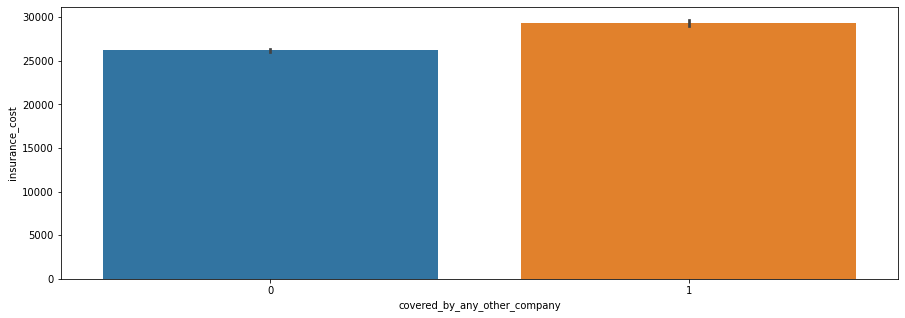

In [218]:
sns.barplot(x="covered_by_any_other_company", y="insurance_cost", data=df)

<AxesSubplot:xlabel='Occupation', ylabel='insurance_cost'>

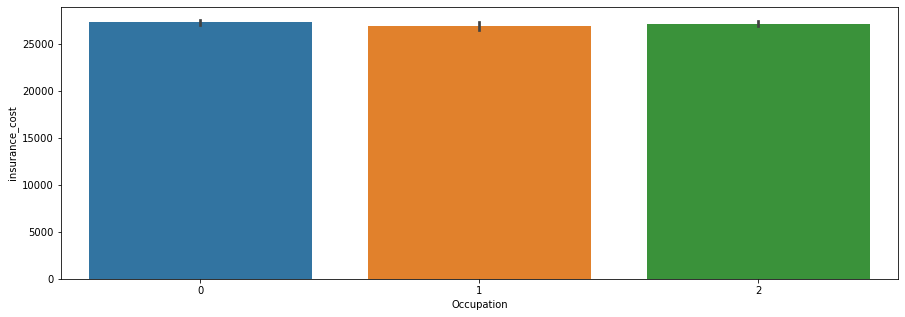

In [219]:
sns.barplot(x="Occupation", y="insurance_cost", data=df)

<AxesSubplot:xlabel='Location', ylabel='insurance_cost'>

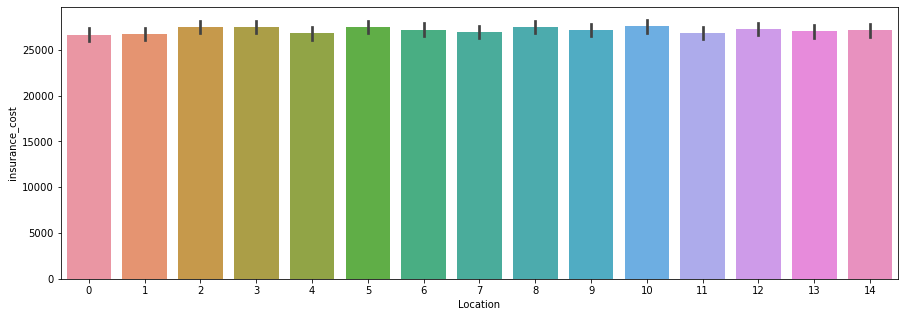

In [220]:
sns.barplot(x="Location", y="insurance_cost", data=df)

In [75]:
df_1=df.copy()

In [76]:
df_1.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,1,2,0,4866,28,1,0,...,31.2,0,3,67,0,2,1,1,25,20978
1,0,0,0,2,4,1,6411,50,0,0,...,34.2,1,6,58,0,2,1,3,27,6170
2,1,0,0,0,4,3,4509,68,0,0,...,40.4,1,6,73,0,0,0,0,32,28382
3,7,4,0,0,2,2,6214,51,0,0,...,22.9,0,3,71,1,2,2,3,37,27148
4,3,1,0,2,2,1,4938,44,0,1,...,26.5,2,1,74,0,1,0,0,34,29616


In [77]:
from sklearn.preprocessing import StandardScaler
X=StandardScaler()
scaled_df=X.fit_transform(df_1)

In [78]:
scaled=pd.DataFrame(scaled_df,columns=df_1.columns)
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
years_of_insurance_with_us,25000.0,-6.197443e-16,1.00002,-1.568750,-0.801455,-0.034160,0.733135,1.500430
regular_checkup_lasy_year,25000.0,-1.056470e-15,1.00002,-0.645043,-0.645043,-0.645043,0.188690,3.523623
adventure_sports,25000.0,-1.265019e-15,1.00002,-0.298316,-0.298316,-0.298316,-0.298316,3.352150
Occupation,25000.0,3.785861e-16,1.00002,-1.119445,-1.119445,-0.006632,1.106181,1.106181
visited_doctor_last_1_year,25000.0,4.659961e-16,1.00002,-2.719070,-0.967205,-0.091272,0.784661,7.792122
cholesterol_level,25000.0,-5.448442e-16,1.00002,-1.002742,-1.002742,-0.210186,0.582370,2.167482
daily_avg_steps,25000.0,-2.032907e-16,1.00002,-3.021282,-0.638925,-0.120485,0.488161,5.734284
age,25000.0,-8.559375e-17,1.00002,-1.795369,-0.864107,0.005071,0.874249,1.805511
heart_decs_history,25000.0,-1.325162e-17,1.00002,-0.240412,-0.240412,-0.240412,-0.240412,4.159520
other_major_decs_history,25000.0,3.912026e-16,1.00002,-0.329915,-0.329915,-0.329915,-0.329915,3.031081


In [79]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

In [80]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

In [81]:
wss

[550000.0000000001,
 512050.5711060007,
 488822.91521834594,
 468560.3233568313,
 452124.9025343006,
 435498.805724535,
 424282.4583975421,
 409753.03349958337,
 403660.980927855,
 406583.38383596455]

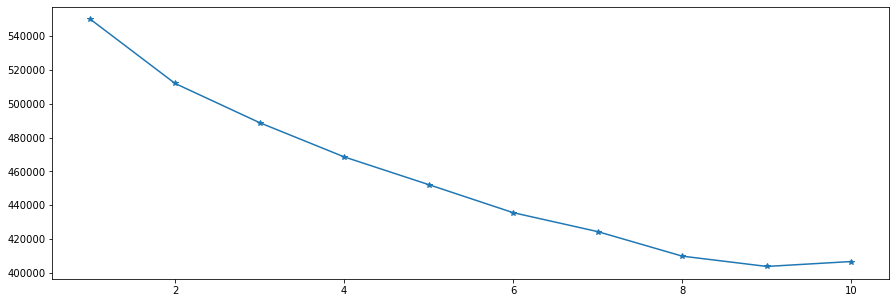

In [82]:
plt.plot(range(1,11), wss,marker='*')

In [83]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
labels = k_means.labels_

In [84]:
df_1["Clus_kmeans"] = labels
df_1.head(20)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,Clus_kmeans
0,3,1,1,1,2,0,4866,28,1,0,...,0,3,67,0,2,1,1,25,20978,3
1,0,0,0,2,4,1,6411,50,0,0,...,1,6,58,0,2,1,3,27,6170,1
2,1,0,0,0,4,3,4509,68,0,0,...,1,6,73,0,0,0,0,32,28382,0
3,7,4,0,0,2,2,6214,51,0,0,...,0,3,71,1,2,2,3,37,27148,0
4,3,1,0,2,2,1,4938,44,0,1,...,2,1,74,0,1,0,0,34,29616,2
5,8,0,0,1,2,4,5306,39,0,0,...,0,2,78,1,2,2,3,13,39488,0
6,8,0,0,2,4,0,4676,40,0,0,...,2,5,81,0,1,1,3,16,37020,3
7,1,0,0,2,4,1,7448,46,0,0,...,3,3,72,0,2,1,0,34,29616,3
8,8,1,0,1,4,0,5632,45,0,0,...,3,11,67,1,2,2,1,12,22212,3
9,4,3,0,1,3,0,4130,38,0,0,...,1,12,63,0,0,1,0,12,8638,1


In [85]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
silhouette_score(scaled_df,labels)

0.06499801813085183

In [87]:
sil_width = silhouette_samples(scaled_df,labels)

In [88]:
df_1['sil_width']=sil_width

In [90]:
df_1['sil_width'][df_1['sil_width']< 0 ].count()

358

In [91]:
df_1.head(5)

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,Clus_kmeans,sil_width
0,3,1,1,1,2,0,4866,28,1,0,...,3,67,0,2,1,1,25,20978,3,0.027666
1,0,0,0,2,4,1,6411,50,0,0,...,6,58,0,2,1,3,27,6170,1,0.096777
2,1,0,0,0,4,3,4509,68,0,0,...,6,73,0,0,0,0,32,28382,0,0.103963
3,7,4,0,0,2,2,6214,51,0,0,...,3,71,1,2,2,3,37,27148,0,0.024123
4,3,1,0,2,2,1,4938,44,0,1,...,1,74,0,1,0,0,34,29616,2,0.093572


In [92]:
df_1.Clus_kmeans.value_counts().sort_index()

0    7634
1    7040
2    2452
3    7874
Name: Clus_kmeans, dtype: int64

In [93]:
clust_profile=df_1
clust_profile=clust_profile.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_1.Clus_kmeans.value_counts().sort_index()
clust_profile

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,sil_width,freq
Clus_kmeans,,,,,,,,,,,,,,,,,,,,,
0,4.094053,0.672649,0.099293,0.174221,3.130862,2.294603,5233.986115,44.834687,0.046764,0.000000,...,6.991616,76.157061,0.330626,1.364422,0.972622,1.936861,30.740372,34001.597852,0.052837,7634
1,4.080540,1.027983,0.039062,1.026278,3.077131,1.170028,5231.208523,44.864915,0.050710,0.000284,...,6.855540,61.225710,0.251278,1.447585,0.998437,3.819602,28.809943,11436.059943,0.062648,7040
2,4.006933,0.738581,0.084829,0.998369,3.137439,1.274878,5203.427406,45.126020,0.128467,1.000000,...,6.890701,71.515905,0.291599,1.455954,0.991436,2.524062,28.828303,27067.981240,0.082045,2452
3,4.117348,0.655194,0.101854,1.796546,3.092202,0.349251,5188.528194,44.982474,0.042799,0.000000,...,6.956693,76.516764,0.326899,1.507239,1.013589,1.915672,26.940056,34574.097282,0.073582,7874


## Linear Regression

In [ ]:
x=df.drop(['insurance_cost'],axis=1)
y=df[['insurance_cost']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [ ]:
x.head()

In [100]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [103]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [104]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for years_of_insurance_with_us is -19.331933363114945
The coefficient for regular_checkup_lasy_year is -410.97977524913523
The coefficient for adventure_sports is 186.77018224478573
The coefficient for Occupation is 4.552955594932844
The coefficient for visited_doctor_last_1_year is -51.39831247157354
The coefficient for cholesterol_level is 22.13627924521841
The coefficient for daily_avg_steps is -0.0241544872620407
The coefficient for age is 2.089441414651534
The coefficient for heart_decs_history is 196.5677470451858
The coefficient for other_major_decs_history is 72.26988345908502
The coefficient for Gender is 22.075954598797807
The coefficient for avg_glucose_level is -0.21265990317474956
The coefficient for bmi is -3.7777055104966806
The coefficient for smoking_status is -3.661267193622765
The coefficient for Location is 7.8266492771426
The coefficient for weight is 1490.7651807331329
The coefficient for covered_by_any_other_company is 1239.1472537020952
The coeff

In [105]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -79773.05899871822


In [106]:
regression_model.score(x_train, y_train)

0.9452429008516744

In [107]:
regression_model.score(x_test, y_test)

0.9432548493145785

In [108]:
#RMSE on Training data
predicted_train=regression_model.fit(x_train, y_train).predict(x_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

3353.844294690015

In [109]:
predicted_test=regression_model.fit(x_train, y_train).predict(x_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

3406.93820253622

In [110]:
data_train = pd.concat([x_train, y_train], axis=1)
data_test=pd.concat([x_test,y_test],axis=1)
data_train.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
6485,0,1,0,2,4,0,4962,41,0,0,...,22.5,0,7,83,0,2,0,0,33,39488
9112,2,0,1,0,2,3,5388,51,0,0,...,46.9,2,4,85,0,2,2,2,11,49360
24381,0,2,0,0,3,3,4619,61,0,0,...,23.1,0,0,77,0,2,1,4,28,39488
11194,3,1,1,0,7,2,3988,71,0,0,...,25.9,1,7,62,1,1,0,2,29,16042
8312,2,0,0,1,2,4,4313,20,0,0,...,31.6,2,2,60,0,2,1,2,13,12340


In [111]:
expr= 'insurance_cost ~ years_of_insurance_with_us + regular_checkup_lasy_year + adventure_sports + Occupation + visited_doctor_last_1_year + cholesterol_level + daily_avg_steps + age + heart_decs_history + other_major_decs_history + Gender + avg_glucose_level + bmi + smoking_status + Location + weight + covered_by_any_other_company + Alcohol + exercise + weight_change_in_last_one_year +fat_percentage'

In [112]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        -79773.058999
years_of_insurance_with_us          -19.331933
regular_checkup_lasy_year          -410.979775
adventure_sports                    186.770182
Occupation                            4.552956
visited_doctor_last_1_year          -51.398312
cholesterol_level                    22.136279
daily_avg_steps                      -0.024154
age                                   2.089441
heart_decs_history                  196.567747
other_major_decs_history             72.269883
Gender                               22.075955
avg_glucose_level                    -0.212660
bmi                                  -3.777706
smoking_status                       -3.661267
Location                              7.826649
weight                             1490.765181
covered_by_any_other_company       1239.147254
Alcohol                              55.275409
exercise                             27.588045
weight_change_in_last_one_year      157.391095
fat_percentag

In [113]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.437e+04
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:39:29   Log-Likelihood:            -1.6689e+05
No. Observations:               17500   AIC:                         3.338e+05
Df Residuals:                   17478   BIC:                         3.340e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [116]:
expr1 = 'insurance_cost ~ adventure_sports+ age +cholesterol_level + weight +  covered_by_any_other_company + weight_change_in_last_one_year + heart_decs_history + other_major_decs_history + Gender + Location + Alcohol + exercise '

In [117]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr1, data = data_train).fit()
lm2.params

Intercept                        -81474.762374
adventure_sports                    133.748230
age                                   1.881602
cholesterol_level                    21.951863
weight                             1500.323591
covered_by_any_other_company       1181.805812
weight_change_in_last_one_year      178.278494
heart_decs_history                  199.386578
other_major_decs_history             75.837891
Gender                                3.681110
Location                             14.551798
Alcohol                              58.236350
exercise                             30.780473
dtype: float64

In [118]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 2.458e+04
Date:                Sun, 29 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:43:26   Log-Likelihood:            -1.6709e+05
No. Observations:               17500   AIC:                         3.342e+05
Df Residuals:                   17487   BIC:                         3.343e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [119]:
mse = np.mean((lm2.predict(data_train.drop('insurance_cost',axis=1))-data_train['insurance_cost'])**2)

In [120]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

3390.768318813534

In [121]:
np.sqrt(lm2.mse_resid) 

3392.028449162348

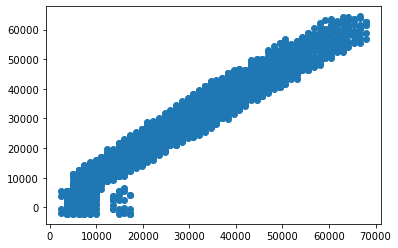

In [122]:
# Prediction on Test data
y_pred = lm2.predict(data_test)
plt.scatter(y_test['insurance_cost'],y_pred )
plt.show()

In [123]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])] 

In [124]:
for i,j in np.array(lm2.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-81474.76) * Intercept + (133.75) * adventure_sports + (1.88) * age + (21.95) * cholesterol_level + (1500.32) * weight + (1181.81) * covered_by_any_other_company + (178.28) * weight_change_in_last_one_year + (199.39) * heart_decs_history + (75.84) * other_major_decs_history + (3.68) * Gender + (14.55) * Location + (58.24) * Alcohol + (30.78) * exercise + 

## SVM

In [129]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [307]:
from sklearn.svm import SVR
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [308]:
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

SVR(kernel='linear')

In [309]:
svr.score(X_train_scaled, y_train)

0.8802953208417043

In [311]:
svr.score(X_test_scaled, y_test)

0.880302436336809

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100], 'kernel': ['linear']}]
grid_search = GridSearchCV(estimator= svr,
                          param_grid = parameters, scoring = 'accuracy',cv = 10)
grid_search = grid_search.fit(X_train_scaled, Y_train)

## DT, RF, ANN

In [135]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [140]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != annr) :
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
    else :
        i.fit(x_train_scaled,y_train)
        scores_train.append(i.score(x_train_scaled, y_train))
        scores_test.append(i.score(x_test_scaled, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train_scaled))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test_scaled))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                          Train RMSE    Test RMSE  Training Score  Test Score
Linear Regression        3353.844295  3406.938203        0.945243    0.943255
Decision Tree Regressor     0.000000  4352.715262        1.000000    0.907377
Random Forest Regressor  1166.999192  3125.393933        0.993370    0.952246
ANN Regressor            2989.885760  3145.103369        0.956483    0.951642


## Polynomial model

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [ ]:
x_poly = poly.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.30, random_state=1)
x_train.shape

## KNN 

In [221]:
X=df.drop(['insurance_cost'],axis=1)
Y=df[['insurance_cost']]

In [236]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=123,test_size=0.30)

In [237]:
X.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,...,avg_glucose_level,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage
0,-0.417807,0.188690,1,1,-0.967205,0,-0.332228,-1.050360,1,0,...,-1.124370,-0.001176,0,3,-0.494422,0,2,1,-0.898041,-0.441634
1,-1.568750,-0.645043,0,2,0.784661,1,1.134787,0.315492,0,0,...,0.708929,0.415660,1,6,-1.459569,0,2,1,0.285180,-0.209944
2,-1.185102,-0.645043,0,0,0.784661,3,-0.671209,1.433007,0,0,...,-0.024391,1.277123,1,6,0.149010,0,0,0,-1.489652,0.369282
3,1.116783,2.689890,0,0,-0.967205,2,0.947731,0.377576,0,0,...,-0.933069,-1.154424,0,3,-0.065467,1,2,2,0.285180,0.948508
4,-0.417807,0.188690,0,2,-0.967205,1,-0.263863,-0.057013,0,1,...,-0.789594,-0.654220,2,1,0.256249,0,1,0,-1.489652,0.600972


In [238]:
Y.head()

,insurance_cost
0,-0.430722
1,-1.464554
2,0.086194
3,0.000041
4,0.172347


In [224]:
df.dtypes

years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                           int8
visited_doctor_last_1_year          int64
cholesterol_level                    int8
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                               int8
avg_glucose_level                   int64
bmi                               float64
smoking_status                       int8
Location                             int8
weight                              int64
covered_by_any_other_company         int8
Alcohol                              int8
exercise                             int8
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost                      int64
dtype: object

In [225]:
cat =['adventure_sports','Occupation','cholesterol_level','heart_decs_history','other_major_decs_history','Gender','smoking_status','Location','covered_by_any_other_company','Alcohol','exercise']

In [226]:
for i in cat:
    df[i]=df[i].astype("object")

In [227]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']
['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [228]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ADVENTURE_SPORTS :  2
1     2043
0    22957
Name: adventure_sports, dtype: int64


OCCUPATION :  3
1     4811
0    10020
2    10169
Name: Occupation, dtype: int64


CHOLESTEROL_LEVEL :  5
4    2054
2    2881
3    2963
0    8339
1    8763
Name: cholesterol_level, dtype: int64


HEART_DECS_HISTORY :  2
1     1366
0    23634
Name: heart_decs_history, dtype: int64


OTHER_MAJOR_DECS_HISTORY :  2
1     2454
0    22546
Name: other_major_decs_history, dtype: int64


GENDER :  2
0     8578
1    16422
Name: Gender, dtype: int64


SMOKING_STATUS :  4
3    3867
1    4329
0    7555
2    9249
Name: smoking_status, dtype: int64


LOCATION :  15
14    1589
8     1620
13    1622
9     1637
11    1658
12    1663
7     1664
3     1669
5     1672
0     1677
4     1680
10    1697
2     1704
6     1706
1     1742
Name: Location, dtype: int64


COVERED_BY_ANY_OTHER_COMPANY :  2
1     7582
0    17418
Name: covered_by_any_other_company, dtype: int64


ALCOHOL :  3
0     2707
1     8541
2    13752
Name: Alcoho

In [229]:
print(cat)

['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']


In [230]:
df =pd.get_dummies(df, columns=cat,drop_first=True)

In [231]:
df.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,...,Location_10,Location_11,Location_12,Location_13,Location_14,covered_by_any_other_company_1,Alcohol_1,Alcohol_2,exercise_1,exercise_2
0,3,1,2,4866,28,97,31.2,67,1,25,...,0,0,0,0,0,0,0,1,1,0
1,0,0,4,6411,50,212,34.2,58,3,27,...,0,0,0,0,0,0,0,1,1,0
2,1,0,4,4509,68,166,40.4,73,0,32,...,0,0,0,0,0,0,0,0,0,0
3,7,4,2,6214,51,109,22.9,71,3,37,...,0,0,0,0,0,1,0,1,0,1
4,3,1,2,4938,44,118,26.5,74,0,34,...,0,0,0,0,0,0,1,0,0,0


In [232]:
df.shape

(25000, 43)

In [233]:
from scipy.stats import zscore

In [234]:
X[['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage']]=X[['years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage']].apply(zscore)

In [235]:
Y[['insurance_cost']]=Y[['insurance_cost']].apply(zscore)

In [239]:
from sklearn.neighbors import KNeighborsRegressor

KNN_model=KNeighborsRegressor()
KNN_model.fit(X_train,Y_train)

KNeighborsRegressor()

In [240]:
Y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, Y_train)
print(model_score)

0.8327209956449816


In [241]:
Y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, Y_test)
print(model_score)

0.7648587703052009


In [242]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, Y_test)
    ac_scores.append(scores)

# changing to misRegression error
MCE = [1 - x for x in ac_scores]
MCE

[0.4627150430584863,
 0.2730627872602871,
 0.23514122969479911,
 0.22681661084533966,
 0.22380707135633116,
 0.2210164460379469,
 0.2216336123025242,
 0.2230204034455262,
 0.22430547122941513,
 0.22586593555654533]

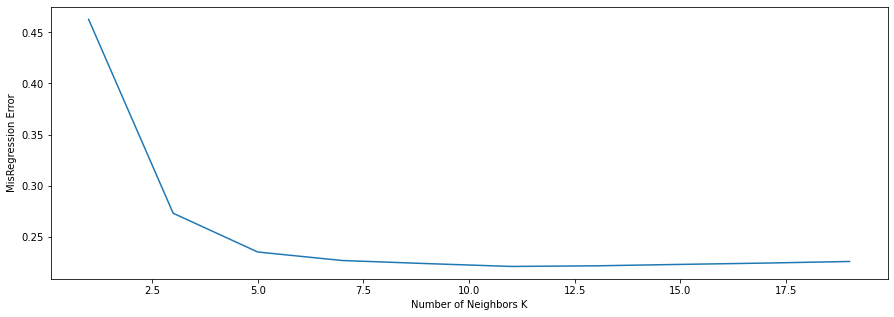

In [243]:
import matplotlib.pyplot as plt
# plot misRegression error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('MisRegression Error')
plt.show()

## Ensemble Learning - Bagging

In [245]:
from sklearn.ensemble import AdaBoostRegressor


In [246]:
abcl = AdaBoostRegressor(n_estimators=10, random_state=1)
#abcl = AdaBoostRegressor( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

In [247]:
y_train_predict = abcl.predict(x_train)
print(abcl.score(x_train , y_train))

0.9483660802284467


In [248]:
abcl = AdaBoostRegressor(n_estimators=10, random_state=1)
#abcl = AdaBoostRegressor( n_estimators=50,random_state=1)
abcl = abcl.fit(x_test, y_test)

In [249]:
y_test_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))

0.9472235665438947


## Ensemble Learning - GradientBoost

In [250]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(x_train, y_train)

In [251]:
y_train_predict = gbcl.predict(x_train)
model_score = gbcl.score(x_train, y_train)
print(model_score)

0.9556681127914469


In [252]:
y_test_predict = gbcl.predict(x_test)
model_score = gbcl.score(x_test, y_test)
print(model_score)

0.9542241171265452


## Ensemble Learning - Bagging

In [269]:
from sklearn.tree import DecisionTreeRegressor
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn import metrics

In [270]:
from sklearn import tree

In [271]:
dTree = DecisionTreeRegressor( random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [272]:
from sklearn.ensemble import BaggingRegressor

bgcl = BaggingRegressor(base_estimator=dTree, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(x_train, y_train)

In [273]:
model_score =Bagging_model.score(x_train, y_train)
print(model_score)

1.0


In [274]:
model_score =Bagging_model.score(x_test, y_test)
print(model_score)

0.1624


## Naive Bayes Model

In [275]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [285]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [286]:
model_score = NB_model.score(x_train, y_train)
print(model_score)

0.18782857142857143


In [287]:
model_score = NB_model.score(x_test, y_test)
print(model_score)

0.15786666666666666


## Random forest

In [303]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestRegressor(n_estimators=100,random_state=1)
RF_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [304]:
model_score =RF_model.score(x_train, y_train)
print(model_score)

0.9933497804642204


In [305]:
model_score = RF_model.score(x_test, y_test)
print(model_score)

0.9523690198002402
